First we will import all of the necessary libraries

In [39]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from plotnine import *

Next, we will import the data

In [3]:
data = pd.read_csv("charcters_stats.csv")

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


Next, we will filter out all the rows where "Total" column is 5, the intelligence, strength, speed, durability, and combat score is 1, and the power score is 0, just like in the previous question. 

In [15]:
total_is_not_5 = data['Total']!=5
data_filter = data[total_is_not_5]

0      50
1      38
2      88
3      50
4      63
       ..
606    88
607    50
608    50
609    75
610    50
Name: Intelligence, Length: 434, dtype: int64

Now, we will select only the numeric columns of the data, however, total will not be included as it is simply the sum of the other columns. 

In [31]:
num_data = data_filter[["Intelligence", "Strength", "Speed", "Durability", "Power", "Combat"]]
num_data

,Intelligence,Strength,Speed,Durability,Power,Combat
0,50,31,43,32,25,52
1,38,100,17,80,17,64
2,88,14,35,42,35,85
3,50,90,53,64,84,65
4,63,80,53,90,55,95
...,...,...,...,...,...,...
606,88,10,12,28,12,14
607,50,10,35,28,31,28
608,50,100,27,100,83,28
609,75,10,23,28,100,56


Now we will perform a TSNE dimensionality reduction to two dimensions.

In [32]:
projection = TSNE(n_components=2).fit_transform(num_data);
lowd = pd.DataFrame(projection, columns=["X1","X2"])
lowd["Alignment"] = data_filter["Alignment"];
lowd

,X1,X2,Alignment
0,17.792475,15.005700,good
1,-0.767272,-19.132103,good
2,18.941578,28.456375,good
3,-16.092651,-10.013321,good
4,-11.307132,-19.667076,bad
...,...,...,...
429,11.216040,20.309988,bad
430,16.107224,13.322412,good
431,-4.516148,-20.396212,NaN
432,3.250508,13.481257,good


Now these results will be written to a csv file.

In [33]:
lowd.to_csv('TSNE_data.csv')

Now the plot made in Question 3 in R will be reproduced here using plotnine.

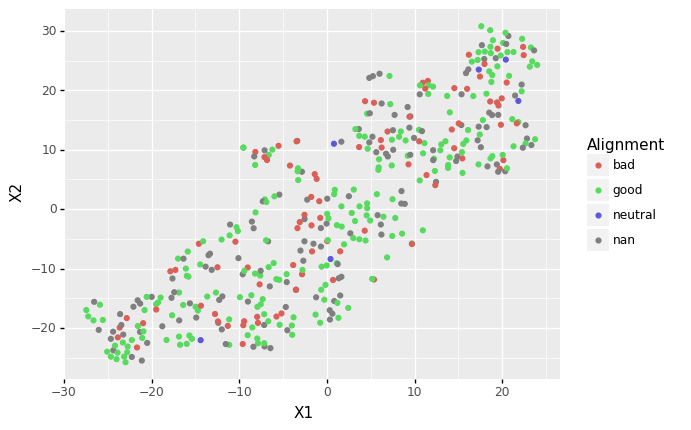

<ggplot: (8736205833963)>

In [36]:
x= (ggplot(lowd,aes("X1","X2")) + geom_point(aes(color="Alignment")))
x

Now this plot will be saved as an image for easier access in the "Homework 5.pdf"

In [42]:
x.save('Q4Plot.png')

/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: Q4Plot.png


The figure looks exactly the same as that plotted with ggplot in R